In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
df = pd.read_csv("/content/drive/MyDrive/it24101839/rawDataset.csv", sep=';')

In [4]:
print("Shape:", df.shape)

Shape: (4424, 1)


Original class distribution: Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


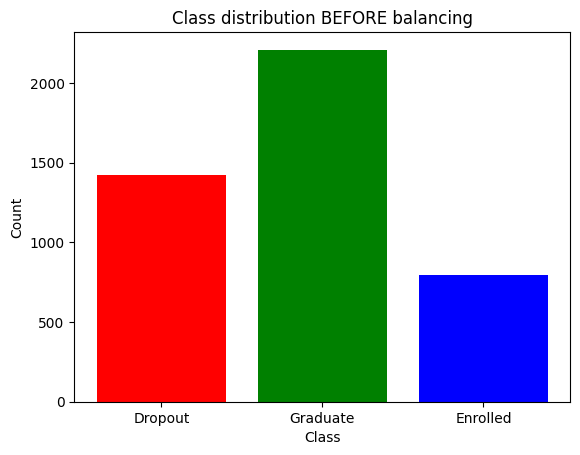

In [28]:
# 2) Features (X) and target (y)
X = df.drop(columns=["Target"])
y = df["Target"]

# 3) Show original class distribution
print("Original class distribution:", Counter(y))
plt.bar(Counter(y).keys(), Counter(y).values(), color=['red','green','blue'])
plt.title("Class distribution BEFORE balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Balanced class distribution: Counter({'Dropout': 2209, 'Graduate': 2209, 'Enrolled': 2209})


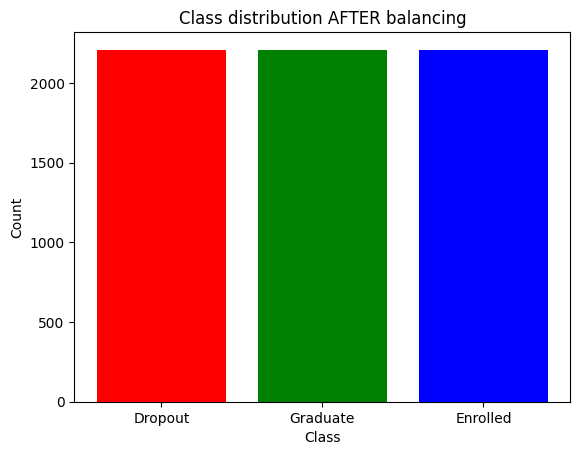

In [29]:
# 4) Apply SMOTE (oversampling minority classes)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 5) Show new class distribution
print("Balanced class distribution:", Counter(y_res))
plt.bar(Counter(y_res).keys(), Counter(y_res).values(), color=['red','green','blue'])
plt.title("Class distribution AFTER balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [30]:
# 6) Save balanced dataset
balanced = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name="Target")], axis=1)
balanced.to_csv("data/processed/balanced_dataset.csv", index=False)
print("Balanced dataset saved to data/processed/balanced_dataset.csv")

Balanced dataset saved to data/processed/balanced_dataset.csv
